# Coding Block 2 - Logistic Regression

### Load the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
'''
...
'''

'\n...\n'

### Read the dataset (You can test both preprocessed and raw data). 

In [6]:
df = pd.read_csv("../data/diabetes_cleaned.csv")

### Let's Do Some Predictive Modeling

### Stratification:
Split the dataset into train (75%) and test datasets (25%)

In [7]:
# Split the dataset into train (75%) and test (25%) datasets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Do a Logistic Regression with test and training data

In [8]:
# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report)

Accuracy: 0.7883597883597884
Confusion Matrix:
[[109  14]
 [ 26  40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.74      0.61      0.67        66

    accuracy                           0.79       189
   macro avg       0.77      0.75      0.76       189
weighted avg       0.78      0.79      0.78       189



### Calculate Odds Ratios 
Find out about the feature importance by calculating the odds ratios of the logistic regression model 

In [9]:
# Calculate the odds ratios
odds_ratios = np.exp(logreg.coef_[0])
feature_importance = pd.DataFrame({'Feature': X.columns, 'Odds Ratio': odds_ratios})
print('Feature Importance (Odds Ratios):')
print(feature_importance)

Feature Importance (Odds Ratios):
                    Feature  Odds Ratio
0               Pregnancies    1.157079
1                   Glucose    1.036776
2             BloodPressure    0.992027
3             SkinThickness    1.009188
4                   Insulin    1.000822
5                       BMI    1.086659
6  DiabetesPedigreeFunction    3.751049
7                       Age    1.014801


### Logistic Regression Using Standardization

Do a logistic regression on data that has been standardized before. Are there differences in the model output?

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the input variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized dataset into train (75%) and test (25%) datasets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Train a logistic regression model on standardized data
logreg_scaled = LogisticRegression(max_iter=1000)
logreg_scaled.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

# Evaluate the model
accuracy_scaled = metrics.accuracy_score(y_test_scaled, y_pred_scaled)
conf_matrix_scaled = metrics.confusion_matrix(y_test_scaled, y_pred_scaled)
classification_report_scaled = metrics.classification_report(y_test_scaled, y_pred_scaled)

print(f'Accuracy (Standardized Data): {accuracy_scaled}')
print('Confusion Matrix (Standardized Data):')
print(conf_matrix_scaled)
print('Classification Report (Standardized Data):')
print(classification_report_scaled)

Accuracy (Standardized Data): 0.7936507936507936
Confusion Matrix (Standardized Data):
[[109  14]
 [ 25  41]]
Classification Report (Standardized Data):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.75      0.62      0.68        66

    accuracy                           0.79       189
   macro avg       0.78      0.75      0.76       189
weighted avg       0.79      0.79      0.79       189



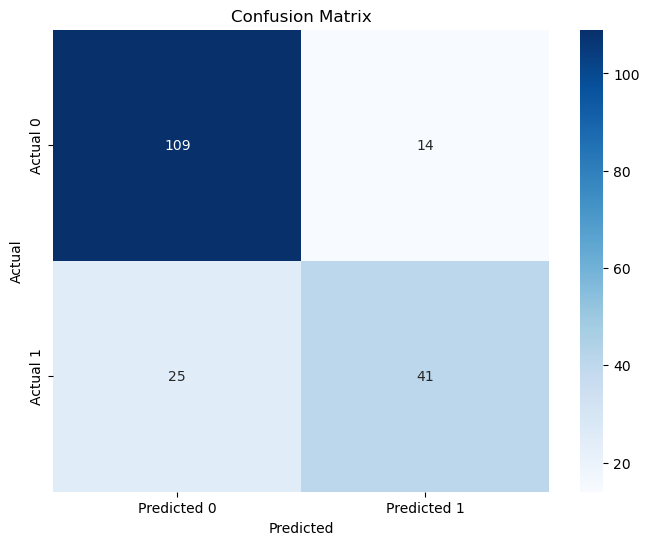

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_scaled, y_pred_scaled)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

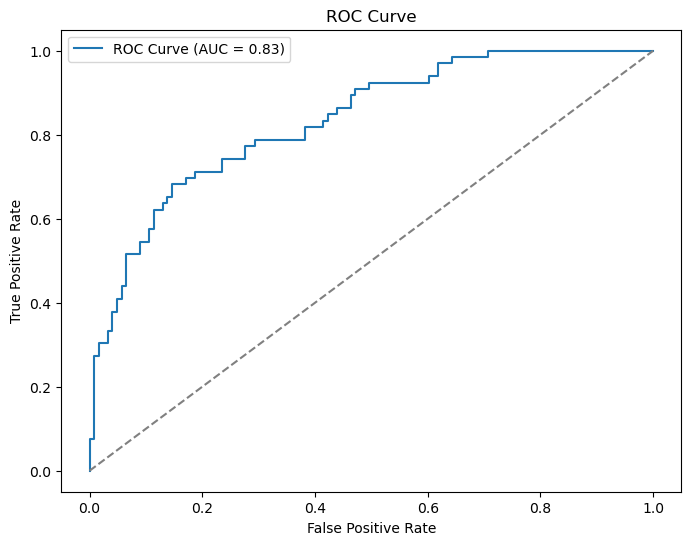

In [12]:
# ROC Curve
y_pred_prob = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_scaled, y_pred_prob)
roc_auc = roc_auc_score(y_test_scaled, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

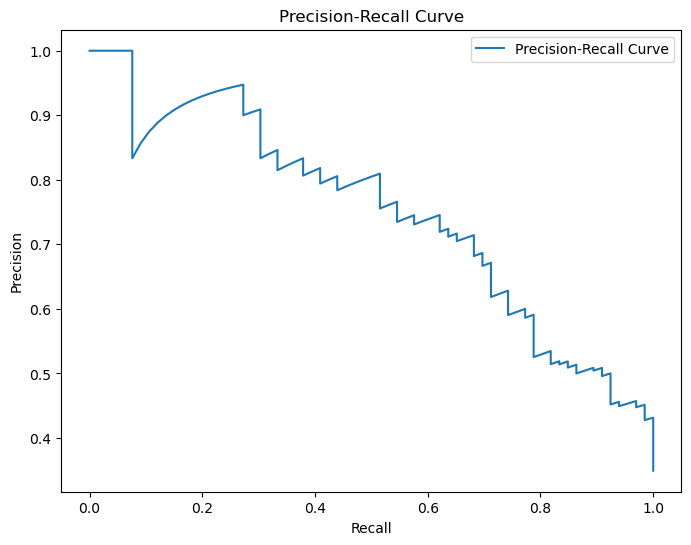

In [13]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_scaled, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

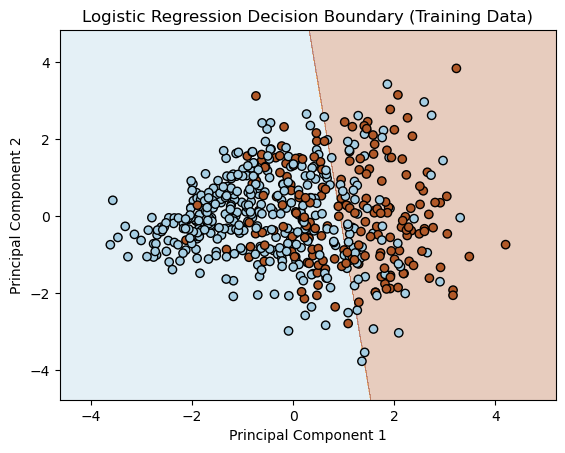

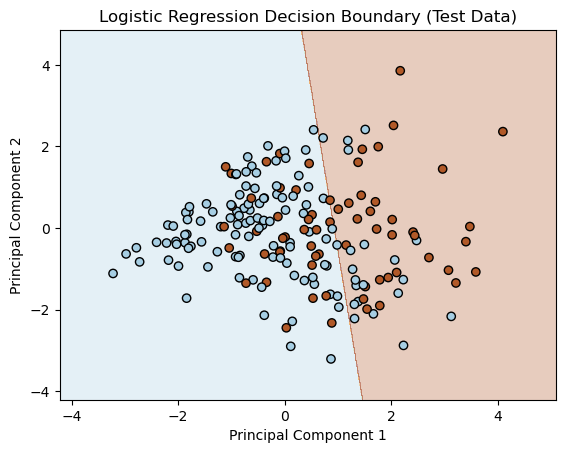

In [14]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Train a logistic regression model on the 2D projected data
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train_scaled)

# Predict on the test data
y_pred_pca = logreg_pca.predict(X_test_pca)


# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

# Plot decision boundary for training data
plot_decision_boundary(logreg_pca, X_train_pca, y_train_scaled, 'Logistic Regression Decision Boundary (Training Data)')

# Plot decision boundary for test data
plot_decision_boundary(logreg_pca, X_test_pca, y_test_scaled, 'Logistic Regression Decision Boundary (Test Data)')